Đọc dữ liệu

In [1]:
import pandas as pd 
# load dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Xử lý dữ liệu

In [2]:
print("Nulls")
print("=====")
print(dataset.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
print("0s")
print("==")
print(dataset.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [4]:
import numpy as np

#thay thế các giá trị 0 bằng NaN
dataset[['Glucose','BloodPressure','SkinThickness','Insulin',
'BMI','DiabetesPedigreeFunction','Age']] = dataset[['Glucose','BloodPressure','SkinThickness',
'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

dataset.fillna(dataset.mean(), inplace = True) # thay thế NaN bằng giá trị trung bình của cột

In [5]:
print(dataset.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Training set, test set

In [6]:
from sklearn.model_selection import train_test_split

features = list(dataset.columns.values)
features.remove('Outcome')
print(features)

X = dataset[features]
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
(576, 8)
(192, 8)


In [7]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [8]:
from tensorflow.keras.layers import Dense

model.add(Dense(12, input_dim= 8, activation= 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,
        validation_data=(X_test, y_test),
        epochs=300,
        batch_size=4)

Epoch 1/300
144/144 [==============================] - 1s 3ms/step - loss: 1.3383 - accuracy: 0.6076 - val_loss: 1.0114 - val_accuracy: 0.6354
Epoch 2/300
144/144 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.6424 - val_loss: 0.8443 - val_accuracy: 0.6667
Epoch 3/300
144/144 [==============================] - 0s 2ms/step - loss: 0.7631 - accuracy: 0.6528 - val_loss: 0.7484 - val_accuracy: 0.6823
Epoch 4/300
144/144 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.6562 - val_loss: 0.7327 - val_accuracy: 0.6875
Epoch 5/300
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6753 - val_loss: 0.7317 - val_accuracy: 0.6875
Epoch 6/300
144/144 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6667 - val_loss: 0.7161 - val_accuracy: 0.6823
Epoch 7/300
144/144 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6667 - val_loss: 0.7467 - val_accuracy: 0.6927

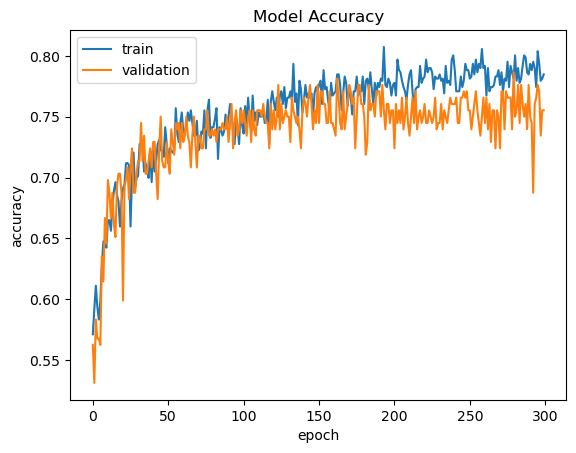

In [ ]:
import matplotlib.pyplot as plt

# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

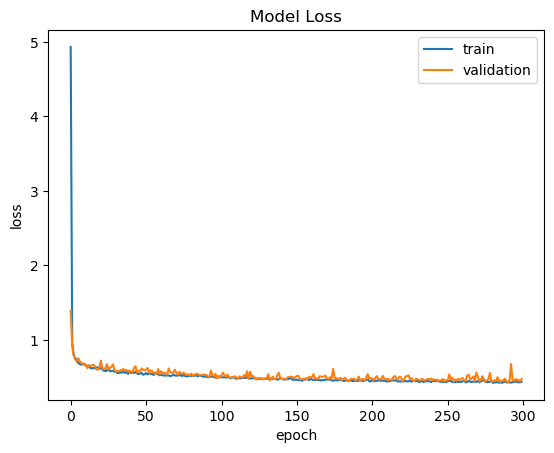

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
pred = model.predict(X_test)
pred = np.where(pred >0.5, 1, 0)

print(pred)

6/6 [==============================] - 0s 800us/step
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [

In [ ]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %s" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.4767235517501831
accuracy: 75.52%
